In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/content/pima-indians-diabetes.csv")
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


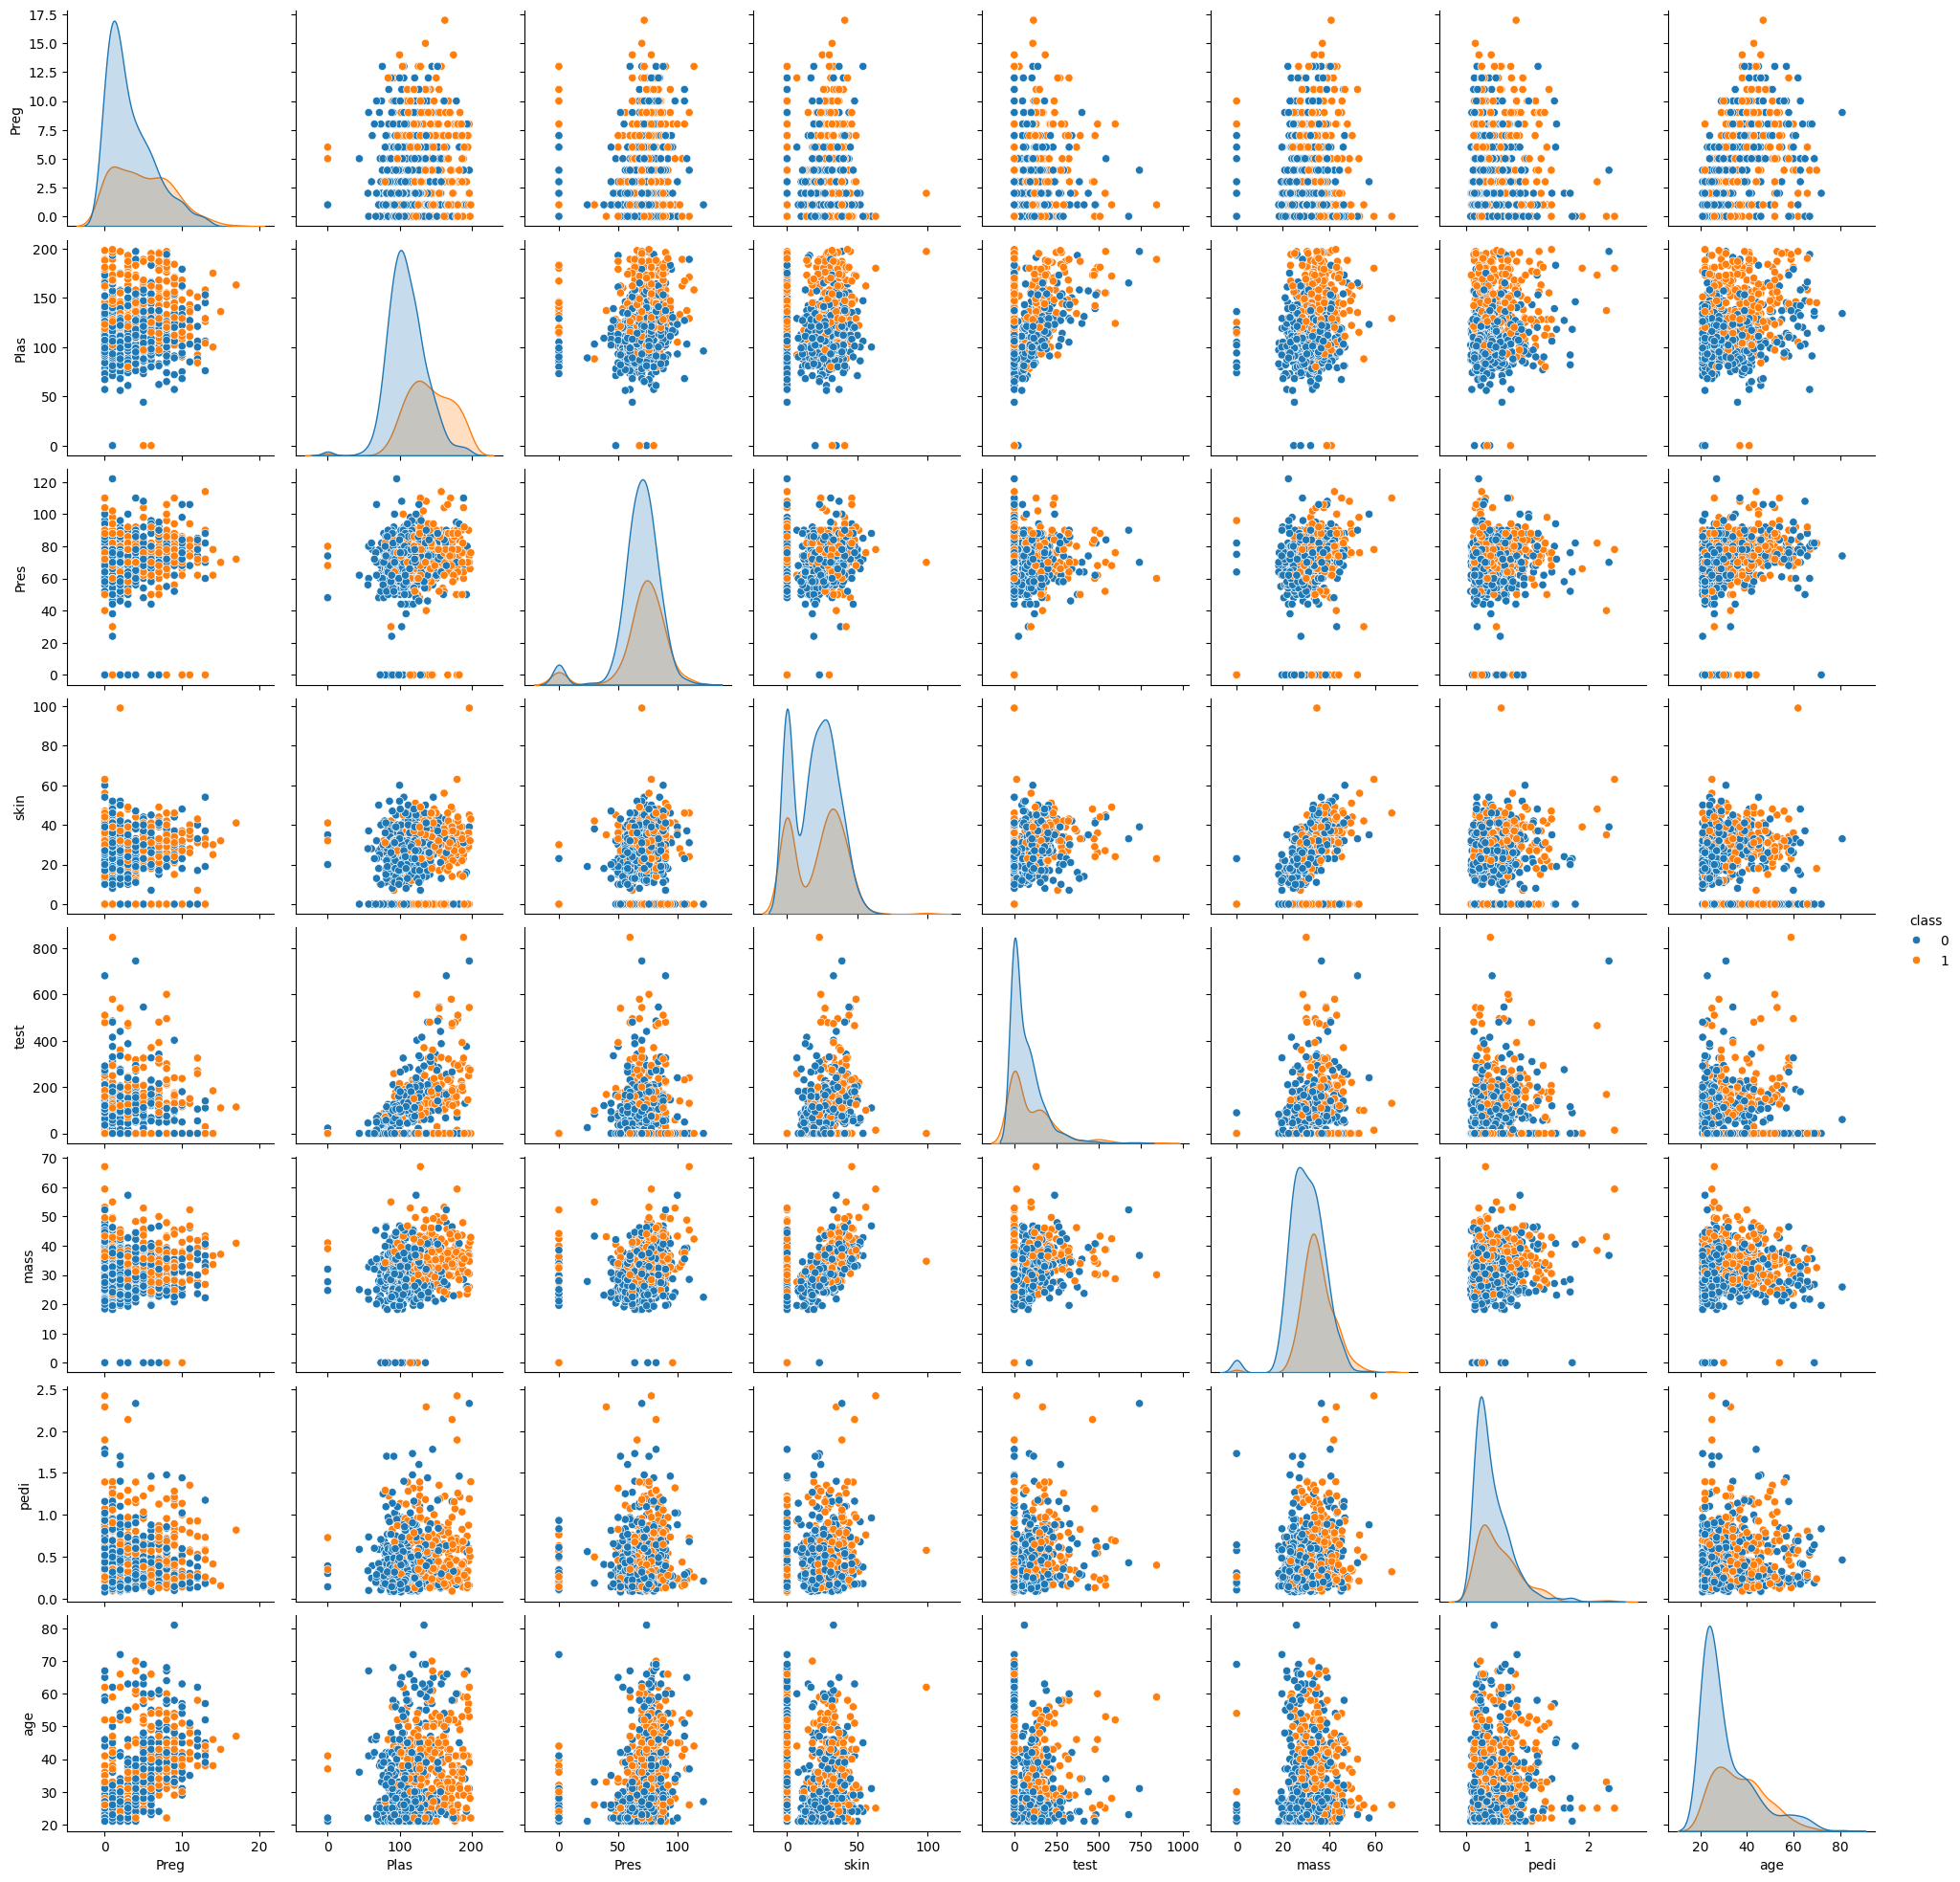

In [3]:
sns.pairplot(data,hue="class")

In [4]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().any()

Preg     False
Plas     False
Pres     False
skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

<Axes: >

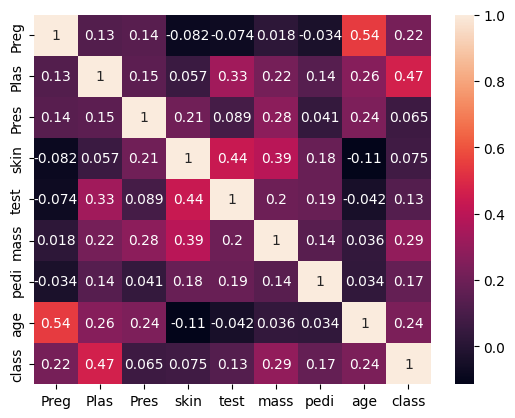

In [6]:
sns.heatmap(data.corr(),annot=True)

In [7]:
x=data.drop("class",axis=1)
y=data[['class']]
x

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


StandardScaler is a preprocessing technique commonly used in machine learning and data mining to standardize features by removing the mean and scaling to unit variance. It's particularly useful when your features have different scales or units, and you want to bring them to a similar scale.

Features with different scales: If your dataset contains features with vastly different scales (e.g., one feature ranges from 0 to 1, while another ranges from 0 to 1000), using StandardScaler can help to ensure that each feature contributes equally to the model's learning process.

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [9]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20,random_state=0)
x_train.shape,y_train.shape

((614, 8), (614, 1))

Import libraries for NN Creation

We use the Sequential model and the Dense layer from the Keras library to build neural network architectures for various machine learning tasks, particularly for tasks involving supervised learning such as classification and regression. Here's why and when we use them:

The # Sequential # model provides a simple way to create neural networks by stacking layers sequentially. This makes it easy to build and understand neural network architectures, especially for beginners.

Although the Sequential model is straightforward, it still offers flexibility in creating neural networks. You can add different types of layers, configure activation functions, regularization techniques, and optimization algorithms as needed.

The # Dense # layer is the basic building block of neural networks, representing a fully connected layer where each neuron is connected to every neuron in the previous layer. This layer is suitable for many tasks and can capture complex patterns in the data.

In [10]:
from keras import Sequential
from keras.layers import Dense

In [11]:
s=Sequential()

# First hidden layer of the network. In this case the activation fn is ReLU and the no of neurons is 5. We are initializing weights as random normal.

In [12]:
s.add(Dense(5,activation='relu',kernel_initializer='random_normal',input_dim=8))

It adds a dense layer with 5 neurons to the sequential model s.

The activation function for the neurons is Rectified Linear Unit (ReLU).

The weights of the layer are initialized randomly from a normal distribution with mean 0 and standard deviation 1.

The input data to the layer has 8 dimensions.

# Second hidden layer

In [13]:
s.add(Dense(5,activation='relu',kernel_initializer='random_normal'))

If you already have a first hidden layer defined in the model and you add another layer with the same specifications, it means you're adding another hidden layer with the same architecture after the first one. This is a common practice in deep neural networks to increase model capacity and learn more complex representations from the data.

# Output Layer: The activation fn is a sigmoid.

In [14]:
s.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))

1: This indicates the number of neurons (units) in the layer. There is 1 neuron in this layer. This typically corresponds to the output of the neural network, particularly in binary classification tasks where the model outputs a single probability value between 0 and 1.

activation='sigmoid': This specifies the activation function for the neurons in the layer. 'sigmoid' is a common activation function used in the output layer of binary classification models. It squashes the output of the neuron to the range [0, 1], allowing it to represent probabilities.

kernel_initializer='random_normal': This specifies the initialization method for the weights of the layer. 'random_normal' initializes the weights randomly from a normal distribution with mean 0 and standard deviation 1.

.


we are using adam optimizer with cross entropy as the loss fn. Accuracy is the metrics which has to be optimized.

In [15]:
s.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

optimizer='adam': This specifies the optimizer used during training. The Adam optimizer is a popular choice for training neural networks due to its adaptive learning rate and momentum properties. It dynamically adjusts the learning rate during training to speed up convergence and improve performance.

loss='binary_crossentropy': This specifies the loss function used to measure the difference between the model's predictions and the actual target values. 'binary_crossentropy' is commonly used in binary classification tasks, where the model outputs probabilities for two classes. It penalizes the model more heavily for predictions that are far from the true label.

metrics=['Accuracy']: This specifies the evaluation metric(s) used to monitor the model's performance during training and evaluation. 'Accuracy' is a commonly used metric for classification tasks, representing the proportion of correctly classified samples. Note that the metric is specified as a list, even if only one metric is used.

.

Fit the model now.

In [16]:
s.fit(x_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
62/62 [==============================] - 2s 4ms/step - loss: 0.6902 - Accuracy: 0.6384
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.6830 - Accuracy: 0.6401
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.6679 - Accuracy: 0.6401
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.6381 - Accuracy: 0.6596
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5975 - Accuracy: 0.7329
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5555 - Accuracy: 0.7687
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5253 - Accuracy: 0.7655
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5064 - Accuracy: 0.7590
Epoch 9/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4947 - Accuracy: 0.7655
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4872 - Accuracy: 0.7638
Epoch 11/50
62/62 [

batch_size=10: This specifies the number of samples per gradient update. In each iteration of training, the model is trained on a batch of batch_size samples. Training on batches helps to speed up training and can improve the convergence of the model.

epochs=50: This specifies the number of epochs, i.e., the number of times the entire training dataset is passed forward and backward through the neural network. One epoch consists of one forward pass and one backward pass of all the training samples. Training for multiple epochs allows the model to learn from the data iteratively and improve its performance over time.

During the training process, the model learns to minimize the loss function specified during compilation ('binary_crossentropy' in this case) by adjusting its weights and biases using the optimization algorithm ('adam' optimizer in this case). The model's performance is evaluated based on the specified metrics ('Accuracy' in this case), and the training progress is displayed in the console, including metrics such as loss and accuracy for each epoch.



In [17]:
y_pred=s.predict(x_test)
y_pred=(y_pred>0.5)

5/5 [==============================] - 0s 2ms/step


In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[91 16]
 [19 28]]
